Today we will scrape the data from One of the biggest social media platform "Twitter". We will examine the user's reaction over the Sad demise of Famous Bollywood Actor, Sushant Sigh Rajput. For Scraping the twitter data without API, we will use "GetOldTweets3" Library.

It's a Python 3 library and a corresponding command line utility for accessing old tweets.

In [84]:
! pip install GetOldTweets3
print("\n \n Library imported Successfully \n")


 
 Library imported Successfully 



Now Let's Load The Standard Libraries.

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

You can find the Documentation of GetOldTweets3 Library [Here](https://pypi.org/project/GetOldTweets3/)

We will Search for the Name Sushant Singh Rajput in 10000 tweets in the duration of 14-06-2020 to 24-06-2020. (You can increase the limit according to your need in project)

In [86]:
import GetOldTweets3 as got
text_query = "Sushant Singh Rajput"
count = 10000

# Creation of query object
tweetCriteria = got.manager.TweetCriteria().setQuerySearch(text_query).setMaxTweets(count).setSince("2020-06-14").setUntil("2020-06-24")
print("\n Tweet Criteria Created \n")

# Creation of list that contains all tweets
tweets = got.manager.TweetManager.getTweets(tweetCriteria)
print("\n Almost There \n")

# Creating list of chosen tweet data
text_tweets = [[tweet.date, tweet.text,tweet.id,tweet.username] for tweet in tweets]
print("\n We have scraped tweet \n")


 Tweet Criteria Created 


 Almost There 


 We have scraped tweet 



Let's give the column name we need from scraped data.

In [87]:
tweets_df = pd.DataFrame(text_tweets, columns = ['Datetime', 'Text','TweetID','username'])

Convert and Save the scraped data into CSV file. You can also save it to your local storage by giving a file path. 

I am using Google Colab, so it will appear in my upload file section.

In [88]:
tweets_df.to_csv("SSR_Tweet.csv")

For encoding, you can see the document [This Page](https://docs.python.org/3/library/codecs.html#standard-encodings)

Strings are stored internally as sequences of code points in range 0x0–0x10FFFF. The simplest text encoding (called 'latin-1' or 'iso-8859-1') maps the code points 0–255 to the bytes 0x0–0xff, which means that a string object that contains code points above U+00FF can’t be encoded with this codec. 

In simple words, Encoding to use for UTF when reading/writing (ex. ‘utf-8’)


In [89]:
df_Tweet = pd.read_csv("SSR_Tweet.csv" ,  encoding = 'ISO-8859-1')

In [90]:
df_Tweet.head()

,Unnamed: 0,Datetime,Text,TweetID,username
0,0,2020-06-23 23:59:56+00:00,- investigations of his death are continuing a...,1275579373899440128,leylaa_889
1,1,2020-06-23 23:58:40+00:00,"- anyways, Sushant eventually committed âsui...",1275579055144869892,leylaa_889
2,2,2020-06-23 23:58:27+00:00,Just curious.. What happend to his health in N...,1275579000153309185,jsm1245
3,3,2020-06-23 23:58:24+00:00,Still my heart is not believing the demise of ...,1275578988337876992,Its__IPS
4,4,2020-06-23 23:58:02+00:00,BJP MP Manoj Tiwari Demands CBI Inquiry Into S...,1275578896981909504,janki_awaaz


In [91]:
df_Tweet.dtypes

Unnamed: 0     int64
Datetime      object
Text          object
TweetID        int64
username      object
dtype: object

I must say, The Most Important step is to check null values in your dataset.

In [92]:
Check_Null = df_Tweet.isnull()
for column in Check_Null.columns.values.tolist():
    print(column)
    print (Check_Null[column].value_counts())
    print("")  

Unnamed: 0
False    10000
Name: Unnamed: 0, dtype: int64

Datetime
False    10000
Name: Datetime, dtype: int64

Text
False    9940
True       60
Name: Text, dtype: int64

TweetID
False    10000
Name: TweetID, dtype: int64

username
False    10000
Name: username, dtype: int64



So, Here we have 60 Null fields in our Dataset. Let's remove these rows for further processing.

In [93]:
df1 = df_Tweet.dropna(axis=0, how = 'any', thresh= None,subset = ["Text"], inplace= True)

In [94]:
df_Tweet.shape

(9940, 5)

Now, we will first generate a frequency table of all the words present in all the tweets.

In [95]:
def gen_freq(Text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in Text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

gen_freq(df_Tweet.Text.str)

#SushantSinghRajput    3494
Sushant                3003
Singh                  2774
to                     2629
the                    2604
                       ... 
à¤¸à¥à¤µà¤¤à¤           1
à¤¦à¤²à¥à¤              1
#seethefullpicture        1
à¤¹à¥......!             1
#MigrantWorkers           1
Length: 32175, dtype: int64

Now, as we have the frequency of each word. Obviously the name Sushant Singh Rajput has highest frequency because our scraping was centered around him. 

Now, we will use the wordcloud to visualize the results. You can see the documentation [Here](https://pypi.org/project/wordcloud/)

I am giving you all a basic idea about this. The higher the frequency of a word, the brighter and bigger it will appear in word cloud.

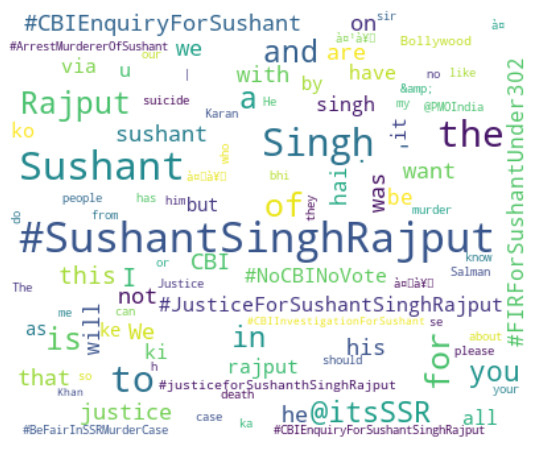

In [96]:
#import word cloud
from wordcloud import WordCloud

#Generate word frequencies
word_freq = gen_freq(df_Tweet.Text.str)

#Generate word cloud
wc = WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Let's use a little bit NLP (Natural Language Processing). With the help of Regular Expression, we can remove certain punctuations, specific words, convert the case of Text.

In [97]:
import re

def clean_text(Text):
    #Remove RT
    Text = re.sub(r'RT', '', Text)
    
    #Fix &
    Text = re.sub(r'&amp;', '&', Text)
    
    #Remove punctuations
    Text = re.sub(r'[?!.;:,#@-]', '', Text)

    #Convert to lowercase to maintain consistency
    Text = Text.lower()
    return Text

Also, we can remove some STOPWORDS. As per [GeeksforGeeks](https://www.geeksforgeeks.org/removing-stop-words-nltk-python/)

**Stop Words:-** A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

We would not want these words to take up space in our database, or taking up valuable processing time. For this, we can remove them easily, by storing a list of words that you consider to stop words. NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages.

In [98]:
#Import list of stopwards
from wordcloud import STOPWORDS

print(STOPWORDS)

{'shall', 'above', 'ought', 'when', 'who', 'between', "mustn't", 'yourself', 'itself', 'about', 'do', "when's", 'she', 'why', 'over', 'but', 'not', 'some', 'you', "let's", 'to', 'by', 'these', 'their', "what's", "they're", "don't", 'were', 'how', 'all', 'him', 'be', 'an', 'k', 'himself', 'herself', "who's", 'there', 'into', 'her', "they'll", 'having', "i've", 'are', 'against', 'however', "she'll", 'out', 'other', "we'll", 'my', 'am', 'only', 'our', 'after', 'down', "that's", "how's", 'same', 'like', 'such', "where's", 'has', 'have', "aren't", 'being', 'it', "weren't", 'before', 'theirs', 'yourselves', 'with', 'is', 'because', 'also', "it's", "we've", 'did', "wasn't", 'your', 'had', "he'll", 'get', 'can', 'once', 'at', "shan't", 'what', 'ours', 'would', 'been', "you've", "you'll", 'his', 'under', "hadn't", 'hers', 'both', "she'd", 'otherwise', 'whom', 'was', 'where', "hasn't", "he's", 'doing', 'that', 'own', "haven't", 'ever', 'if', 'http', 'cannot', "i'm", 'they', "they've", 'very', 'f

So, The final output will be look like this.

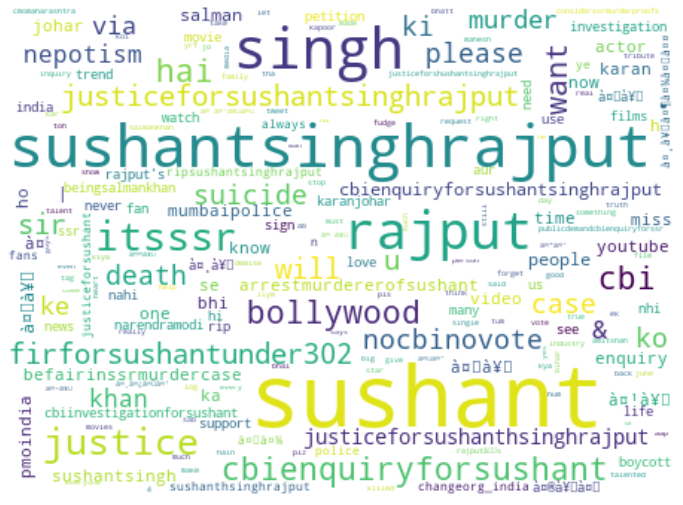

In [99]:
Text = df_Tweet.Text.apply(lambda x: clean_text(x))
word_freq = gen_freq(Text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

So, with the output shown above, We can conclude that, People are talking about Nepotism, CBI Enquiry, Justice, Proper Investigation, Boycott Karan Johar etc. And Yes, "You will be always in our Heart".   